# Problem Statement

## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Getting Data

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train2 = df_train.drop('Loan_Status',axis=1)

In [5]:
df_train2

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
..        ...     ...     ...        ...           ...           ...   
584  LP002911    Male     Yes          1      Graduate            No   
585  LP002912    Male     Yes          1      Graduate            No   
586  LP002916    Male     Yes          0      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925     NaN      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
590  LP002928    Male     Yes          0      Graduate            No   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933     NaN      No         3+      Graduate           Yes   
593  LP002936    Male     Yes          0      Graduate            No   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
596  LP002941    Male     Yes          2  Not Graduate           Yes   
597  LP002943    Male      No        NaN      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   
602  LP002953    Male     Yes         3+      Graduate            No   
603  LP002958    Male      No          0      Graduate            No   
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not 

### Merging train and test data to manipulate the fields in both

In [6]:
combined = df_train2.append(df_test)

In [7]:
combined.tail()

Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009             1777.0       113.0             360.0   
363             4158              709.0       115.0             360.0   
364             3250             1993.0       126.0             360.0   
365             5000             2393.0       158.0             360.0   
366             9200                0.0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Semiurban  
365             1.0         Rural  
366             1.0         Rural

In [8]:
df_train.shape

(614, 13)

In [9]:
df_test.shape

(367, 12)

In [10]:
combined.shape

(981, 12)

In [11]:
combined.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [12]:
combined.isnull().sum() # checking total null values in each field

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [13]:
combined.shape

(981, 12)

In [14]:
combined.reset_index(inplace=True)
combined.drop(['index', 'Loan_ID'],axis=1,inplace=True)  # removing index number and loan id for manipulating data

In [15]:
combined.shape

(981, 11)

In [16]:
combined.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

### function to manipulate data 
#### Manipulation includes removing null data (Not available) and making all data to numeric for predictions

In [17]:
def fill_gender():
    global combined
    combined['Gender'].fillna('Male',inplace=True)
    
def fill_marriage():
    global combined
    combined['Married'].fillna('No',inplace=True)
   
def fill_employed():
    global combined
    combined['Self_Employed'].fillna('No',inplace=True)

def fill_LoanAmount():
    global combined
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(),inplace=True)

def fill_cred():
    global combined
    combined['Credit_History'].fillna(2,inplace=True)

In [18]:
fill_gender()
fill_marriage()
fill_employed()
fill_LoanAmount()
fill_cred()

In [19]:
combined['Gender'] = combined.Gender.map({'Male':0, 'Female':1})
combined['Married'] = combined.Married.map({'No':0, 'Yes':1})
combined['Education'] = combined.Education.map({'Not Graduate':0, 'Graduate':1})
combined['Self_Employed'] = combined.Self_Employed.map({'No':0, 'Yes':1})

In [20]:
combined.tail()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
976       0        1         3+          0              1             4009   
977       0        1          0          1              0             4158   
978       0        0          0          1              0             3250   
979       0        1          0          1              0             5000   
980       0        0          0          1              1             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
976             1777.0       113.0             360.0             1.0   
977              709.0       115.0             360.0             1.0   
978             1993.0       126.0             360.0             2.0   
979             2393.0       158.0             360.0             1.0   
980                0.0        98.0             180.0             1.0   

    Property_Area  
976         Urban  
977         Urban  
978     Semiurban  
979         Rural  
980         Rural

In [21]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [22]:
combined['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [23]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [24]:
def family_size():
    global combined
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d == '1' else 0)
    combined['Small Family'] = combined['Dependents'].map(lambda d: 1 if d == '2' else 0)
    combined['Large Family'] = combined['Dependents'].map(lambda d: 1 if d == '3+' else 0)
    
    combined.drop('Dependents',axis=1, inplace=True)

In [25]:
family_size()

In [26]:
combined.head()

Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       126.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  Singleton  Small Family  Large Family  
0         Urban          0             0             0  
1         Rural          1             0             0  
2         Urban          0             0             0  
3         Urban          0             0             0  
4         Urban          0             0             0

In [27]:
def total_income():
    global combined
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome', 'CoapplicantIncome'],inplace=True, axis=1)

In [28]:
def loanRatio():
    global combined
    combined['Income_Loan_Ratio'] = combined['Total_Income'] / combined['LoanAmount']

In [29]:
total_income()

In [30]:
loanRatio()

In [31]:
combined.head()

Gender  Married  Education  Self_Employed  LoanAmount  Loan_Amount_Term  \
0       0        0          1              0       126.0             360.0   
1       0        1          1              0       128.0             360.0   
2       0        1          1              1        66.0             360.0   
3       0        1          0              0       120.0             360.0   
4       0        0          1              0       141.0             360.0   

   Credit_History Property_Area  Singleton  Small Family  Large Family  \
0             1.0         Urban          0             0             0   
1             1.0         Rural          1             0             0   
2             1.0         Urban          0             0             0   
3             1.0         Urban          0             0             0   
4             1.0         Urban          0             0             0   

   Total_Income  Income_Loan_Ratio  
0        5849.0          46.420635  
1        6091.0          47.585938  
2        3000.0          45.454545  
3        4941.0          41.175000  
4        6000.0          42.553191

In [32]:
combined.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
Singleton             0
Small Family          0
Large Family          0
Total_Income          0
Income_Loan_Ratio     0
dtype: int64

In [33]:
combined['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [34]:
def property_area():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'],prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)

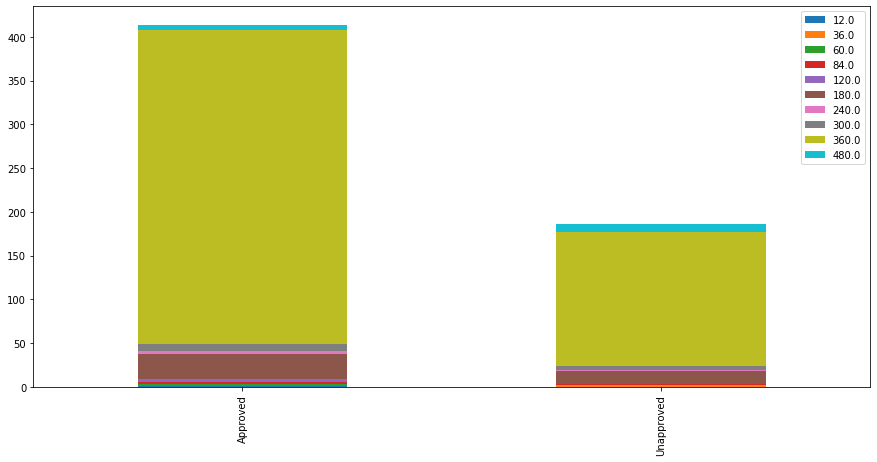

In [35]:
approved_loans = df_train[df_train['Loan_Status'] == 'Y']['Loan_Amount_Term'].value_counts()
unapproved_loans = df_train[df_train['Loan_Status'] == 'N']['Loan_Amount_Term'].value_counts()

df = pd.DataFrame([approved_loans,unapproved_loans])
df.index = ['Approved','Unapproved']

df.plot(kind='bar',stacked=True, figsize=(15,7))


In [36]:
def loan_process_terms():
    global combined
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda d: 1 if d<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda d: 1 if d>60 and d<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda d: 1 if d>=180 and d<=300 else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda d: 1 if d>300 else 0)
    combined.drop('Loan_Amount_Term', inplace=True, axis=1)

In [37]:
loan_process_terms()

In [38]:
combined.head()

Gender  Married  Education  Self_Employed  LoanAmount  Credit_History  \
0       0        0          1              0       126.0             1.0   
1       0        1          1              0       128.0             1.0   
2       0        1          1              1        66.0             1.0   
3       0        1          0              0       120.0             1.0   
4       0        0          1              0       141.0             1.0   

  Property_Area  Singleton  Small Family  Large Family  Total_Income  \
0         Urban          0             0             0        5849.0   
1         Rural          1             0             0        6091.0   
2         Urban          0             0             0        3000.0   
3         Urban          0             0             0        4941.0   
4         Urban          0             0             0        6000.0   

   Income_Loan_Ratio  Very_Short_Term  Short_Term  Long_Term  Very_Long_Term  
0          46.420635                0           0          0               1  
1          47.585938                0           0          0               1  
2          45.454545                0           0          0               1  
3          41.175000                0           0          0               1  
4          42.553191                0           0          0               1

In [39]:
property_area()

In [40]:
combined.head()

Gender  Married  Education  Self_Employed  LoanAmount  Credit_History  \
0       0        0          1              0       126.0             1.0   
1       0        1          1              0       128.0             1.0   
2       0        1          1              1        66.0             1.0   
3       0        1          0              0       120.0             1.0   
4       0        0          1              0       141.0             1.0   

   Singleton  Small Family  Large Family  Total_Income  Income_Loan_Ratio  \
0          0             0             0        5849.0          46.420635   
1          1             0             0        6091.0          47.585938   
2          0             0             0        3000.0          45.454545   
3          0             0             0        4941.0          41.175000   
4          0             0             0        6000.0          42.553191   

   Very_Short_Term  Short_Term  Long_Term  Very_Long_Term  Property_Rural  \
0                0           0          0               1               0   
1                0           0          0               1               1   
2                0           0          0               1               0   
3                0           0          0               1               0   
4                0           0          0               1               0   

   Property_Semiurban  Property_Urban  
0                   0               1  
1                   0               0  
2                   0               1  
3                   0               1  
4                   0               1

In [41]:
def check_cred_hist():
    global combined
    combined['Good_history'] = combined['Credit_History'].map(lambda h: 1 if h==1 else 0)
    combined['Bad_history'] = combined['Credit_History'].map(lambda h: 1 if h==0 else 0)
    combined['Unknown_history'] = combined['Credit_History'].map(lambda h: 1 if h==2 else 0)
    combined.drop('Credit_History', inplace=True, axis=1)

In [42]:
check_cred_hist()

In [43]:
combined.tail()

Gender  Married  Education  Self_Employed  LoanAmount  Singleton  \
976       0        1          0              1       113.0          0   
977       0        1          1              0       115.0          0   
978       0        0          1              0       126.0          0   
979       0        1          1              0       158.0          0   
980       0        0          1              1        98.0          0   

     Small Family  Large Family  Total_Income  Income_Loan_Ratio  \
976             0             1        5786.0          51.203540   
977             0             0        4867.0          42.321739   
978             0             0        5243.0          41.611111   
979             0             0        7393.0          46.791139   
980             0             0        9200.0          93.877551   

     Very_Short_Term  Short_Term  Long_Term  Very_Long_Term  Property_Rural  \
976                0           0          0               1               0   
977                0           0          0               1               0   
978                0           0          0               1               0   
979                0           0          0               1               1   
980                0           0          1               0               1   

     Property_Semiurban  Property_Urban  Good_history  Bad_history  \
976                   0               1             1            0   
977                   0               1             1            0   
978                   1               0             0            0   
979                   0               0             1            0   
980                   0               0             1            0   

     Unknown_history  
976                0  
977                0  
978                1  
979                0  
980                0

### Scaling the non-binary values for faster computation

In [44]:
def scale_data(df):
    df -= df.min()
    df /= df.max()
    return df

combined['LoanAmount'] = scale_data(combined['LoanAmount'])
combined['Total_Income'] = scale_data(combined['Total_Income'])
combined['Income_Loan_Ratio'] = scale_data(combined['Income_Loan_Ratio'])

In [45]:
combined.head(30)

Gender  Married  Education  Self_Employed  LoanAmount  Singleton  \
0        0        0          1              0    0.169320          0   
1        0        1          1              0    0.172214          1   
2        0        1          1              1    0.082489          0   
3        0        1          0              0    0.160637          0   
4        0        0          1              0    0.191027          0   
5        0        1          1              1    0.373372          0   
6        0        1          0              0    0.124457          0   
7        0        1          1              0    0.215630          0   
8        0        1          1              0    0.230101          0   
9        0        1          1              0    0.492041          1   
10       0        1          1              0    0.088278          0   
11       0        1          1              0    0.144718          0   
12       0        1          1              0    0.276411          0   
13       0        0          1              0    0.151954          0   
14       0        1          1              0    0.011577          0   
15       0        0          1              0    0.167873          0   
16       0        0          0              0    0.131693          1   
17       1        0          1              0    0.096961          0   
18       0        1          0              0    0.179450          0   
19       0        1          1              0    0.153401          0   
20       0        1          0              0    0.137482          0   
21       0        1          1              0    0.442836          1   
22       0        1          0              0    0.154848          0   
23       0        1          0              0    0.149059          0   
24       0        1          1              0    0.205499          1   
25       0        1          1              1    0.263386          0   
26       0        1          1              0    0.163531          0   
27       0        1          0              0    0.146165          0   
28       0        0          0              0    0.037627          0   
29       1        0          1              0    0.160637          0   

    Small Family  Large Family  Total_Income  Income_Loan_Ratio  \
0              0             0      0.055394           0.071120   
1              0             0      0.058435           0.073382   
2              0             0      0.019583           0.069245   
3              0             0      0.043980           0.060939   
4              0             0      0.057292           0.063614   
5              1             0      0.102705           0.050902   
6              0             0      0.030255           0.059660   
7              0             1      0.051510           0.049077   
8              1             0      0.051409           0.044934   
9              0             0      0.281141           0.113432   
10             1             0      0.030896           0.089159   
11             1             0      0.036426           0.058302   
12             1             0      0.122389           0.089509   
13             0             0      0.040863           0.060923   
14             1             0      0.011853           0.253320   
15             0             0      0.044094           0.057882   
16             0             0      0.027075           0.050817   
17             0             0      0.025994           0.070662   
18             0             0      0.043302           0.052340   
19             0             0      0.058548           0.083975   
20             0             0      0.078157           0.123978   
21             0             0      0.127429           0.052374   
22             0             0      0.038576           0.056500   
23             1             0      0.048267           0.072557   
24             0             0      0.065361           0.066397   
25             0             

In [46]:
combined.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
LoanAmount            0
Singleton             0
Small Family          0
Large Family          0
Total_Income          0
Income_Loan_Ratio     0
Very_Short_Term       0
Short_Term            0
Long_Term             0
Very_Long_Term        0
Property_Rural        0
Property_Semiurban    0
Property_Urban        0
Good_history          0
Bad_history           0
Unknown_history       0
dtype: int64

### Importing libraries for Model Selection and predictions

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [48]:
# this will calculate the accuracy of the model

def get_score(clf,X,y,scoring='accuracy'):
    score = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    return np.mean(score)

In [49]:
# this will get the training and testing models

def get_train_test_targets():
    global combined
    target = df_train['Loan_Status'].map({'Y':1, 'N':0})
    train = combined.head(614)
    test = combined[614:]
    return train,test,target

In [50]:
train, test, target = get_train_test_targets()

In [51]:
# getting a random forest classifier to get the most important features form the dataset

clf = RandomForestClassifier(n_estimators = 50, max_features='sqrt')
clf = clf.fit(train,target)

In [52]:
feat = pd.DataFrame()
feat['Feature'] = train.columns
feat['Importance'] = clf.feature_importances_
feat.sort_values(by='Importance', ascending=True, inplace=True)
feat.set_index('Feature', inplace=True)

In [53]:
# displaying important features in increading order fo inportance

feat

Importance
Feature                       
Short_Term            0.002718
Very_Short_Term       0.004825
Long_Term             0.010690
Very_Long_Term        0.012364
Large Family          0.012521
Small Family          0.013446
Property_Urban        0.015905
Property_Rural        0.016801
Gender                0.017091
Self_Employed         0.018771
Property_Semiurban    0.019202
Education             0.019755
Singleton             0.021054
Unknown_history       0.021236
Married               0.025520
Good_history          0.085765
LoanAmount            0.152467
Total_Income          0.172939
Bad_history           0.176513
Income_Loan_Ratio     0.180419

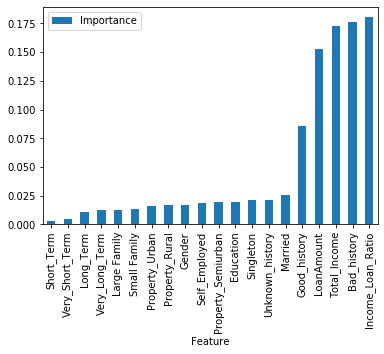

In [54]:
# displaying important features in increading order fo inportance
feat.plot(kind='bar')

In [55]:
train.shape

(614, 20)

In [56]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [57]:
test.shape

(367, 20)

In [58]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [63]:
# building a randomforest model 

model = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                               bootstrap=True, max_depth=5, min_samples_split=50, min_samples_leaf=10)


model.fit(train,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# get accuracy of out model

get_score(model,train, target, scoring='accuracy')

0.8112109994711793

In [66]:
# predict the test ouputs

output = model.predict(test)

In [67]:
output.shape

(367,)

In [68]:
# building a dataframe of outputs
df_out = pd.DataFrame(output)

In [69]:
# marking Loan_ID with each output data

test_cases=pd.read_csv('test.csv')
df_out['Loan_ID'] = test_cases['Loan_ID']
df_out['Loan_Status'] = np.vectorize(lambda a:'Y' if a == 1 else 'N')(output)

In [70]:
# storing results in Result.CSV

df_out[['Loan_ID', 'Loan_Status']].to_csv('Result.csv',index=False)

# Show Result

In [71]:
result_csv = pd.read_csv('Result.csv')

In [72]:
result_csv

Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
5    LP001054           Y
6    LP001055           Y
7    LP001056           N
8    LP001059           Y
9    LP001067           Y
10   LP001078           Y
11   LP001082           Y
12   LP001083           Y
13   LP001094           N
14   LP001096           Y
15   LP001099           Y
16   LP001105           Y
17   LP001107           Y
18   LP001108           Y
19   LP001115           Y
20   LP001121           Y
21   LP001124           Y
22   LP001128           Y
23   LP001135           Y
24   LP001149           Y
25   LP001153           N
26   LP001163           Y
27   LP001169           Y
28   LP001174           Y
29   LP001176           Y
..        ...         ...
337  LP002856           Y
338  LP002857           Y
339  LP002858           N
340  LP002860           Y
341  LP002867           Y
342  LP002869           Y
343  LP002870           Y
344  LP002876           Y
345  LP002878           Y
346  LP002879           N
347  LP002885           Y
348  LP002890           Y
349  LP002891           Y
350  LP002899           Y
351  LP002901           Y
352  LP002907           Y
353  LP002920           Y
354  LP002921           N
355  LP002932           Y
356  LP002935           Y
357  LP002952           Y
358  LP002954           Y
359  LP002962           Y
360  LP002965           Y
361  LP002969           Y
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]